Adithya Prasad 
Email Spam Classifier Project
Credit: CampusX Youtube Channel

In [14]:
import numpy as np
import pandas as pd

In [16]:
import chardet


with open("spam.csv", "rb") as f:
    rawdata = f.read(100000) 
    result = chardet.detect(rawdata)
    encoding = result["encoding"]

print(f"Detected encoding: {encoding}")


df = pd.read_csv("spam.csv", encoding=encoding)

df.sample(5)  


Detected encoding: Windows-1252


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4824,ham,I am going to sleep. I am tired of travel.,NaN,NaN,NaN
3846,spam,Fantasy Football is back on your TV. Go to Sky...,NaN,NaN,NaN
5523,ham,Going to join tomorrow.,NaN,NaN,NaN
4733,spam,Buy Space Invaders 4 a chance 2 win orig Arcad...,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [18]:
df.shape

(5572, 5)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [24]:
df.sample(5)

,v1,v2
518,ham,That way transport is less problematic than on...
541,ham,A famous quote : when you develop the ability ...
2682,ham,I got a call from a landline number. . . I am ...
5522,ham,Thats cool. I want to please you...
1462,spam,09066362231 URGENT! Your mobile No 07xxxxxxxxx...


In [28]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3238,ham,Am okay. Will soon be over. All the best
4258,ham,Sad story of a Man - Last week was my b'day. M...
4252,ham,Juz now havent woke up so a bit blur blur... C...
3992,ham,Nimbomsons. Yep phone knows that one. Obviousl...
1815,ham,Sian... Aft meeting supervisor got work 2 do l...


In [102]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [104]:
df['target'] = encoder.fit_transform(df['target'])

In [106]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [108]:
df.isnull().sum()

target            0
text              0
num_characters    0
num_words         0
num_sentences     0
dtype: int64

In [110]:
df.duplicated().sum()

0

In [112]:
df = df.drop_duplicates(keep='first')

In [114]:
df.shape

(5169, 5)

In [116]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

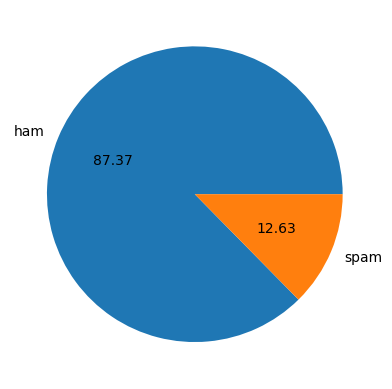

In [118]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [120]:
import nltk

In [122]:
!pip install nltk

In [123]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/adithyaprasad1512/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [126]:
df['num_characters']=df['text'].apply(len)

In [128]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [130]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [132]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [134]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [136]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [138]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [140]:
df.groupby('target')[['num_characters','num_words','num_sentences']].describe()


num_characters                                                    \
                count        mean        std   min    25%    50%    75%   
target                                                                    
0              4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0   
1               653.0  137.891271  30.137753  13.0  132.0  149.0  157.0   

              num_words             ...              num_sentences            \
          max     count       mean  ...   75%    max         count      mean   
target                              ...                                        
0       910.0    4516.0  17.123782  ...  22.0  220.0        4516.0  1.820195   
1       224.0     653.0  27.667688  ...  32.0   46.0         653.0  2.970904   

                                            
             std  min  25%  50%  75%   max  
target                                      
0       1.383657  1.0  1.0  1.0  2.0  38.0  
1       1.488425  1.0  2.0  3.0  4.0   9.0  

[2 rows x 24 columns]

<Axes: xlabel='num_characters', ylabel='Count'>

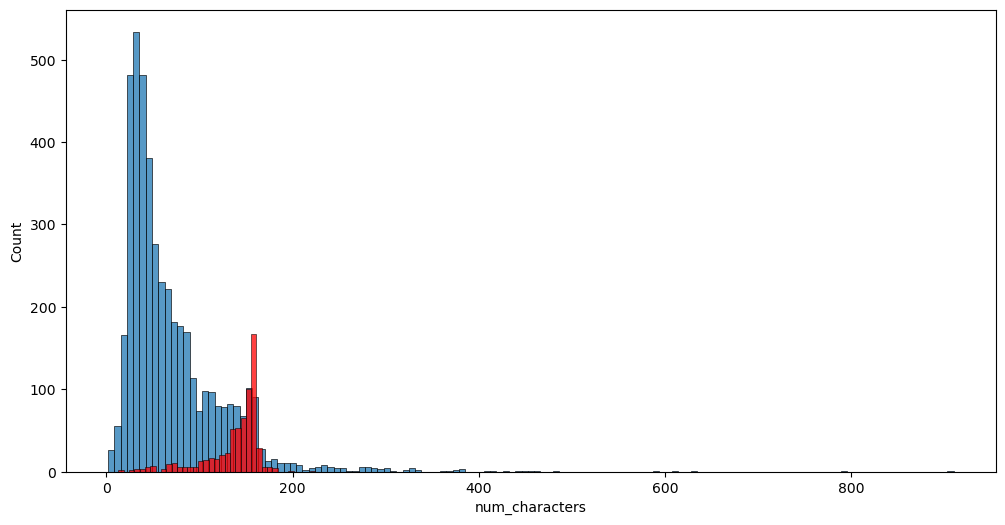

In [148]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

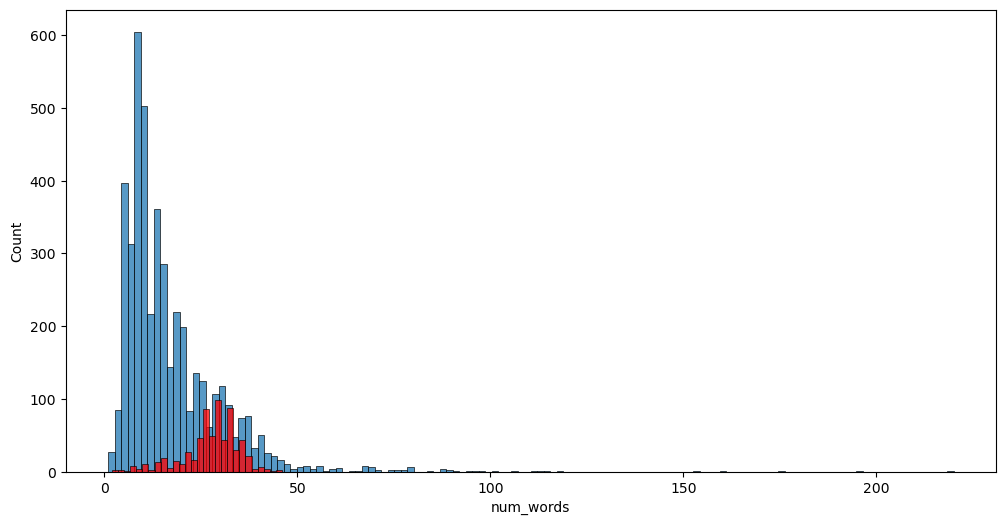

In [150]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

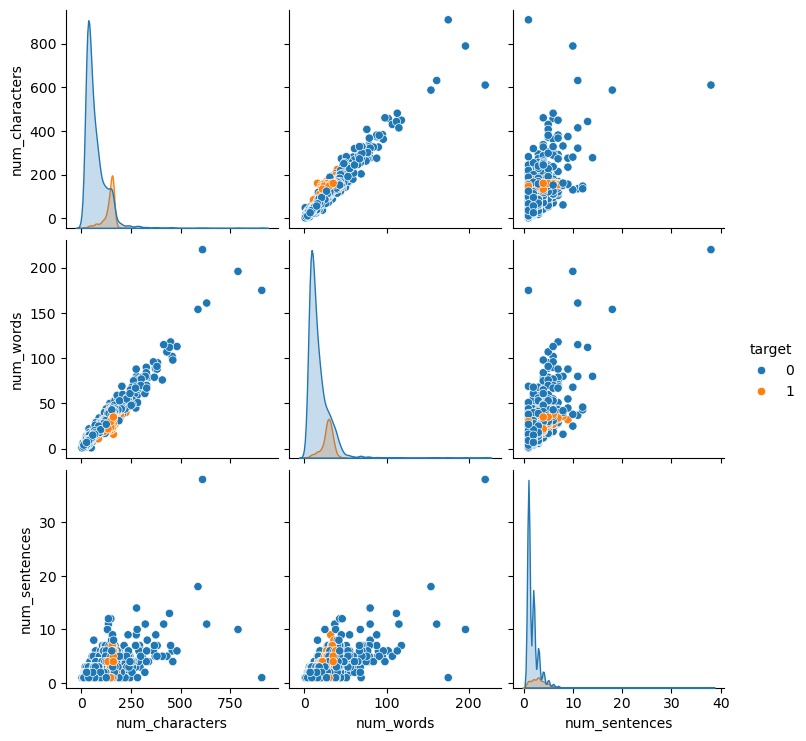

In [158]:
sns.pairplot(df,hue='target')

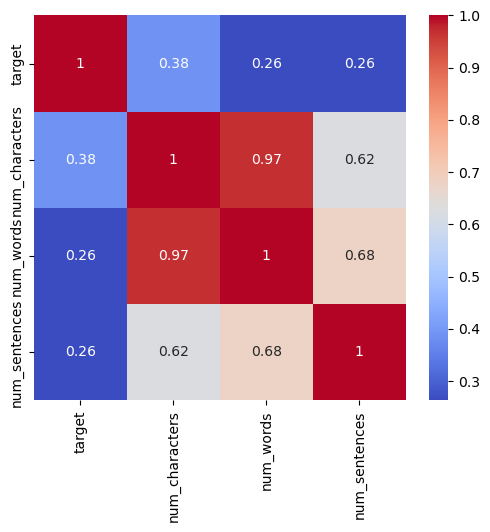

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(), annot=True, cmap='coolwarm')
plt.show()


In [184]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [188]:
df['transformed_text'] = df['text'].apply(transform_text)

In [190]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [198]:
!pip install wordcloud


In [204]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [206]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

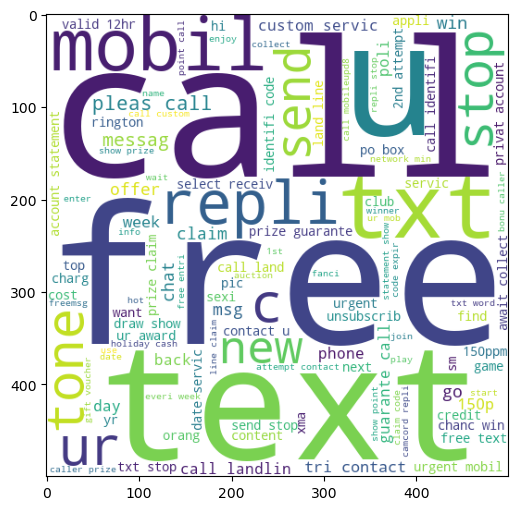

In [210]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [212]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

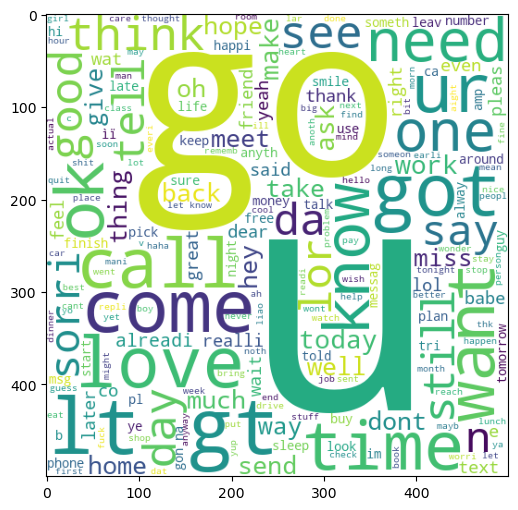

In [214]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [216]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [220]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [222]:
len(spam_corpus)

9939

In [242]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [244]:
len(ham_corpus)

35404

In [304]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [306]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [308]:
X.shape

(5169, 3000)

In [310]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [312]:
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [316]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [318]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [320]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [322]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [324]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [326]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))